# iris数据集数据分析

## iris数据集介绍

iris数据集是最早用于机器学习的数据集之一，包括3种鸢尾花品种分类（每分类50个样本）共150个数据样本，其中有一个分类能够和其他两分类线性可分。

变量(cm):
- 花萼长度
- 花萼宽度
- 花瓣长度
- 花瓣宽度

## 数据处理过程

**加载软件包**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    silhouette_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import shap

**加载数据并可视化**


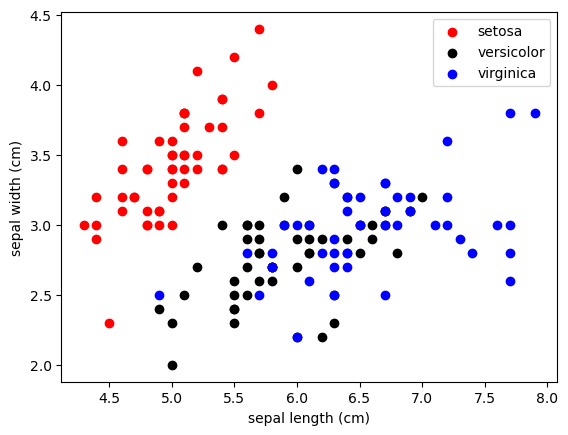

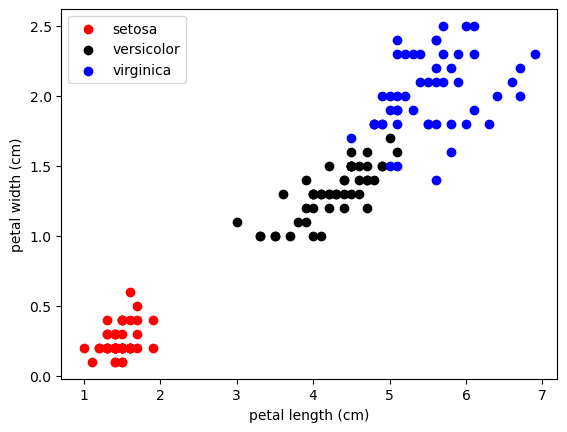

In [3]:
X, y = load_iris(return_X_y=True)

# visualization
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="setosa")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="black", label="versicolor")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color="blue", label="virginica")

plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()
# the other features can be visualized in the same way
plt.scatter(X[y == 0][:, 2], X[y == 0][:, 3], color="red", label="setosa")
plt.scatter(X[y == 1][:, 2], X[y == 1][:, 3], color="black", label="versicolor")
plt.scatter(X[y == 2][:, 2], X[y == 2][:, 3], color="blue", label="virginica")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

在可视化中将花萼和花瓣的特征分别绘制散点图，能够表明
setosa类较versicolor类和virginica类相距更远单独成簇，表明其能够与其他两类线性可分；剩余两类在花萼散点图中杂糅，在花瓣特征散点图中较为明显的分为两类，表明花瓣是区分三类鸢尾花的良好依据。其长度和宽度按照1～3cm，3～5cm，5～7cm将鸢尾花大致分为三类。


**进行PCA和重要性分析**


Explained variance ratio: [0.92461872 0.05306648]
Total explained variance: 0.9776852063187977
Feature importance: [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


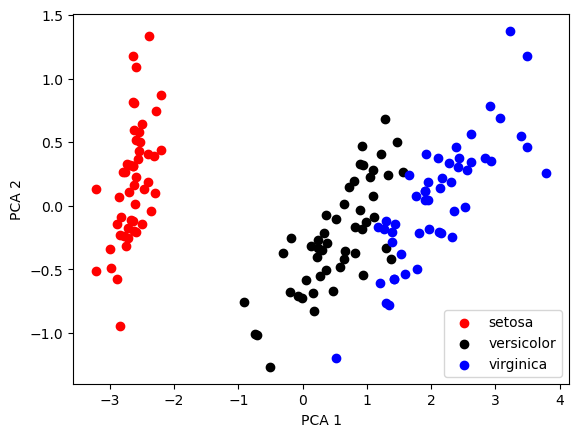

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {np.sum(pca.explained_variance_ratio_)}")
# print feature importance
print(f"Feature importance: {pca.components_}")
# visualize the data
plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], color="red", label="setosa")
plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], color="black", label="versicolor")
plt.scatter(X_pca[y == 2][:, 0], X_pca[y == 2][:, 1], color="blue", label="virginica")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

通过PCA，能够得出将数据从4维降到2维能够保留97.76％的信息，能够说明实际上鸢尾花数据集的数据有效性比较集中，能够通过降维的方式简化模型，而通过重要性分析能够得出，通过PCA降维后的数据散点图能够较明显的将鸢尾花分为3类，表明了PCA降维处理的正确性。



**使用未降维的数据集进行分类和聚类任务**

Using 150 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


  0%|          | 0/150 [00:00<?, ?it/s]

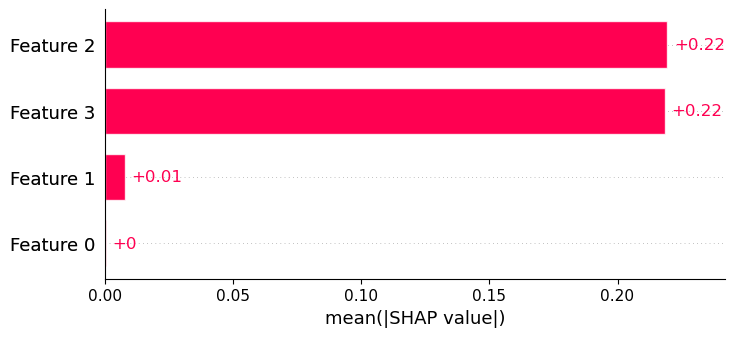

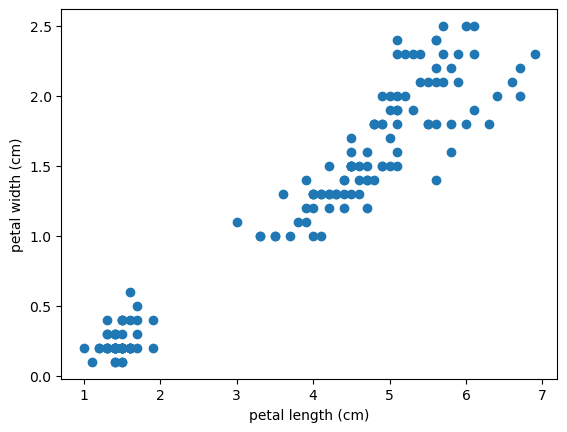

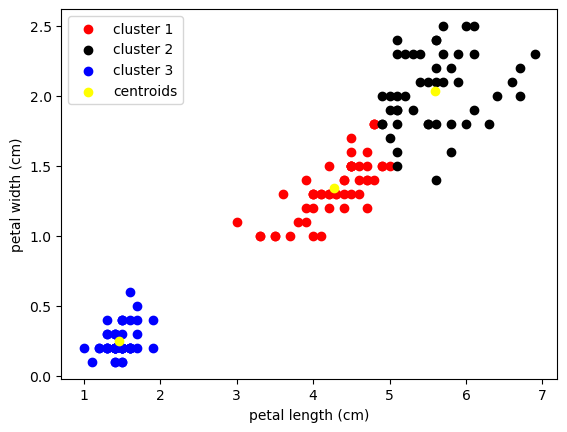

Silhouette score: 0.6604800083974887
confusion matrix:[[ 0  0 50]
 [48  2  0]
 [ 4 46  0]]


In [5]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

explainer=shap.KernelExplainer(model.predict, X)
shap_values = explainer(X)
shap.plots.bar(shap_values)

# cluster and report

X, y = load_iris(return_X_y=True)
X = X[:, 2:]
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[y_pred == 0][:, 0], X[y_pred == 0][:, 1], color="red", label="cluster 1")
plt.scatter(
    X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], color="black", label="cluster 2"
)
plt.scatter(X[y_pred == 2][:, 0], X[y_pred == 2][:, 1], color="blue", label="cluster 3")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color="yellow",
    label="centroids",
)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()
print(f"Silhouette score: {silhouette_score(X, y_pred)}")
print(f"confusion matrix:{confusion_matrix(y,y_pred)}")

**使用PCA降维之后的数据进行分类和聚类任务**


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


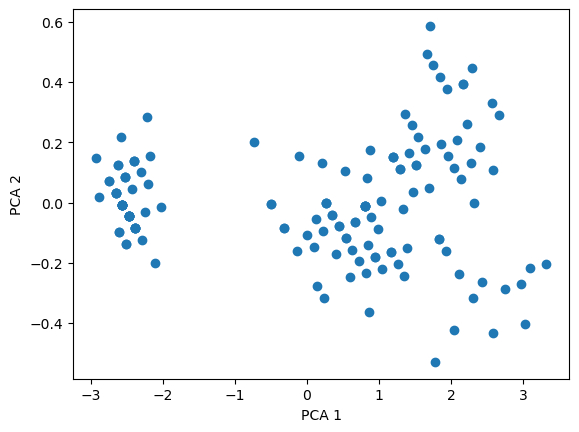

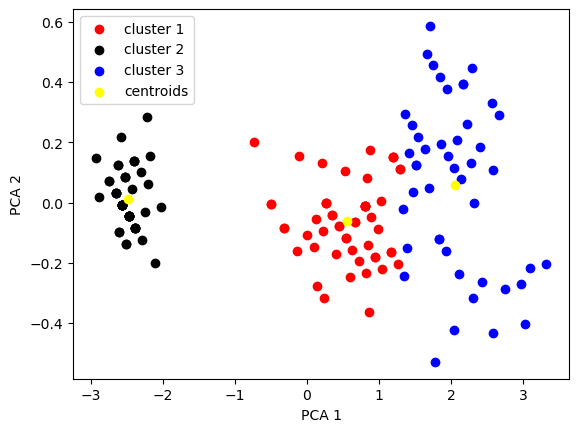

Silhouette score: 0.6602609960912117
confusion matrix:[[ 0 50  0]
 [48  0  2]
 [ 6  0 44]]


In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

# cluster and report

X = X_pca
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[y_pred == 0][:, 0], X[y_pred == 0][:, 1], color="red", label="cluster 1")
plt.scatter(
    X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], color="black", label="cluster 2"
)
plt.scatter(X[y_pred == 2][:, 0], X[y_pred == 2][:, 1], color="blue", label="cluster 3")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color="yellow",
    label="centroids",
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()
print(f"Silhouette score: {silhouette_score(X, y_pred)}" )
print(f"confusion matrix:{confusion_matrix(y,y_pred)}")




## 结论
从上述结果能够得出，PCA降维前后所得到的分类和聚类结果均较好，准确率均达到或接近100％，聚类各簇较为集中，能够表明鸢尾花数据集能够有效的被分类预测,被降维后信息基本没有损失。

同时对于分类结果使用SHAP重要性预测，能够得出，特征2和特征3（即花瓣长度和花瓣宽度）对于模型训练的贡献最大，而特征0和特征1（即花萼长度和花萼宽度）对于模型训练的贡献较小。表明花瓣是对于鸢尾花分类的重要依据。

从而我们能够得出，鸢尾花数据集能够有效的通过现有特征进行预测工作，且花瓣是鸢尾花较为重要的分类依据。